In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from pandas.core import datetools
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


/Users/basillatif/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



ImportError: cannot import name 'datetools' from 'pandas.core' (/Users/basillatif/anaconda3/lib/python3.7/site-packages/pandas/core/__init__.py)

**#Change the input data to the stock under study**

In [ ]:
amzn_test=pd.read_csv('nflx_data.csv')
amzn_test=amzn_test[amzn_test['Date']<'2018-01-01'].sort_values('Date')
amzn_test=amzn_test.drop(['Open','High','Low','Close','Volume'],axis=1)
amzn_test

In [0]:
amzn_test['Date']=pd.to_datetime(amzn_test['Date'])
amzn_test=amzn_test.rename(columns={"Date": "ds"})
amzn_test=amzn_test.rename(columns={"Adj. Close": "y"})

In [0]:
print(amzn_test['ds'].max())
print(amzn_test['ds'].min())

2017-12-29 00:00:00
2012-11-01 00:00:00


In [0]:
amzn=pd.read_csv('nflx_data.csv')
amzn=amzn[amzn['Date']<'2017-01-01']
amzn=amzn.drop(['Open','High','Low','Close','Volume'],axis=1)
amzn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 309 to 1357
Data columns (total 8 columns):
Date           1049 non-null object
Ex-Dividend    1049 non-null float64
Split Ratio    1049 non-null float64
Adj. Open      1049 non-null float64
Adj. High      1049 non-null float64
Adj. Low       1049 non-null float64
Adj. Close     1049 non-null float64
Adj. Volume    1049 non-null float64
dtypes: float64(7), object(1)
memory usage: 73.8+ KB


In [0]:
amzn.head()

,Date,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
308,2016-12-30,0.0,1.0,766.47,767.3999,748.28,749.87,4139449.0
309,2016-12-29,0.0,1.0,772.40,773.4000,760.85,765.15,3158299.0
310,2016-12-28,0.0,1.0,776.25,780.0000,770.50,772.13,3301025.0
311,2016-12-27,0.0,1.0,763.40,774.6500,761.20,771.40,2638725.0
312,2016-12-23,0.0,1.0,764.55,766.5000,757.99,760.59,1981616.0


In [0]:
amzn_df = amzn.copy()
amzn_df.loc[:, 'Date'] = pd.to_datetime(amzn.loc[:,'Date'])

In [0]:
amzn_df

,Date,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
308,2016-12-30,0.0,1.0,766.47,767.3999,748.28,749.8700,4139449.0
309,2016-12-29,0.0,1.0,772.40,773.4000,760.85,765.1500,3158299.0
310,2016-12-28,0.0,1.0,776.25,780.0000,770.50,772.1300,3301025.0
311,2016-12-27,0.0,1.0,763.40,774.6500,761.20,771.4000,2638725.0
312,2016-12-23,0.0,1.0,764.55,766.5000,757.99,760.5900,1981616.0
...,...,...,...,...,...,...,...,...
1352,2012-11-07,0.0,1.0,235.65,235.6600,229.42,232.0608,3624200.0
1353,2012-11-06,0.0,1.0,235.41,237.7500,234.45,237.5600,2661300.0
1354,2012-11-05,0.0,1.0,232.04,234.8300,230.11,234.3300,1846100.0
1355,2012-11-02,0.0,1.0,234.01,237.4000,232.11,232.4224,3374700.0


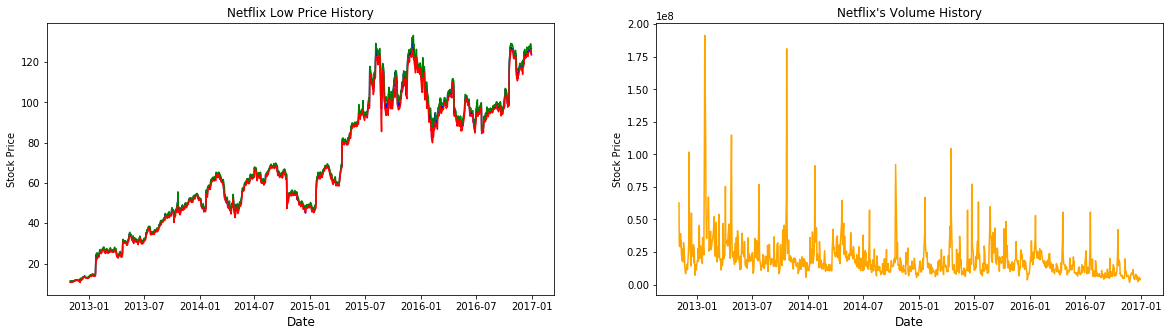

In [0]:
#Plot1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.plot(amzn_df["Date"], amzn_df["Adj. Close"],color="blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Plot2
ax1.plot(amzn_df["Date"], amzn_df["Adj. High"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Netflix High Price History")

# Plot3
ax1.plot(amzn_df["Date"], amzn_df["Adj. Low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Netflix Low Price History")

# Plot4
ax2.plot(amzn_df["Date"], amzn_df["Adj. Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Netflix's Volume History")
plt.show()

In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['Adj. Open', 'Adj. High', 'Adj. Low','Adj. Volume'], axis=1)
ph_df.rename(columns={'Adj. Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,Ex-Dividend,Split Ratio,y
308,2016-12-30,0.0,1.0,749.87
309,2016-12-29,0.0,1.0,765.15
310,2016-12-28,0.0,1.0,772.13
311,2016-12-27,0.0,1.0,771.40
312,2016-12-23,0.0,1.0,760.59


In [0]:
m = Prophet()

m.fit(ph_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Create Future Dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1409,2017-12-26,1026.477421,886.683444,1161.181221
1410,2017-12-27,1026.234962,894.254902,1159.481970
1411,2017-12-28,1026.925618,884.831468,1163.466577
1412,2017-12-29,1026.537111,889.367271,1155.198567
1413,2017-12-30,1030.078012,889.635268,1163.762868


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



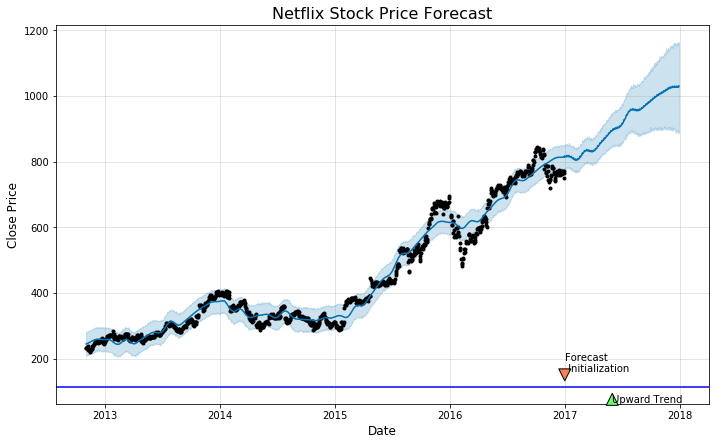

In [0]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2017, 1, 1)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2017, 6, 1)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2017, 1, 1)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for facebook.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Netflix Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1,130), xytext=(starting_date1,160),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1,95), xytext=(trend_date1,65),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=115, color='b', linestyle='-')

plt.show()


In [0]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [0]:
forecast1=forecast.merge(amzn_test, on='ds',how='left')

In [0]:
forecast1=forecast1.dropna()

In [0]:
r2_score(forecast1.y, forecast1.yhat)

0.9761444457508904

In [0]:
mean_squared_error(forecast1.y, forecast1.yhat)

1667.2578504795692

In [0]:
	
mean_absolute_error(forecast1.y, forecast1.yhat)

28.74775294826849

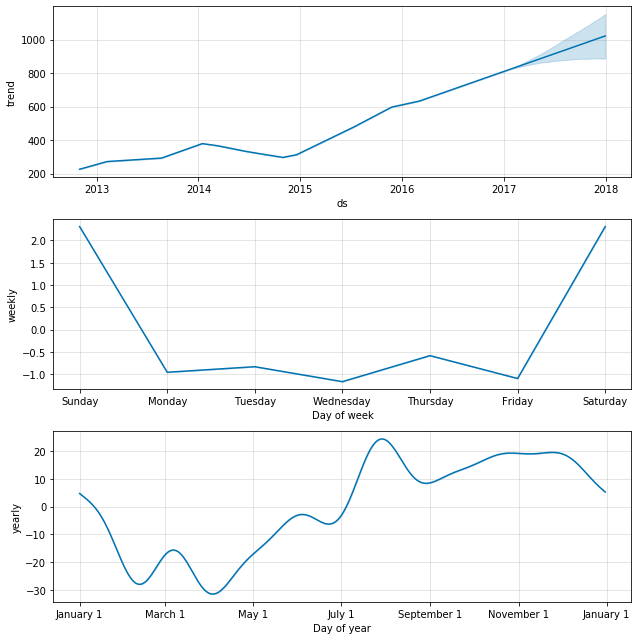

In [0]:
fig2 = m.plot_components(forecast)
plt.show()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


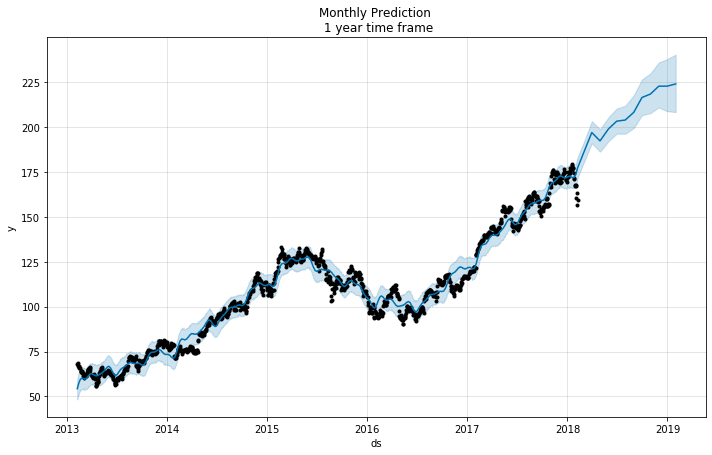

In [0]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

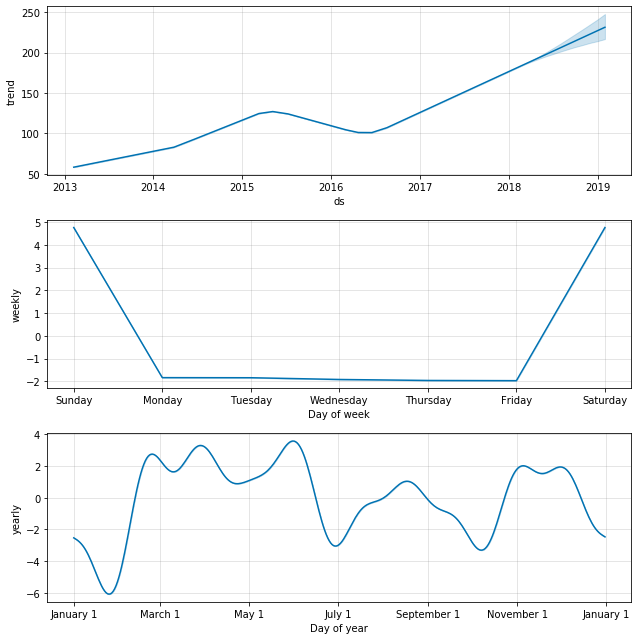

In [0]:
fig = m.plot_components(fcst)
plt.show()